In [46]:
from pathlib import Path

import torch


def get_figures(filepaths):
    indices = []
    for filepath in filepaths:
        indices.append(torch.load(filepath))

    indices = torch.concat(indices, dim=1)

    y = indices.mean(dim=1)
    print(indices.mean())

    std = indices.std(dim=1)
    y_lower = torch.maximum(y - std, indices.min(dim=1).values)
    y_upper = torch.minimum(y + std, indices.max(dim=1).values)

    return {"y": y, "y_lower": y_lower, "y_upper": y_upper}


figures_by_threshold = {
    0.07: get_figures(Path("outputs/celeba-0.07/").glob("*.pt")),
    0.08: get_figures(Path("outputs/celeba-0.08/").glob("*.pt")),
}

tensor(12.7866)
tensor(9.0926)


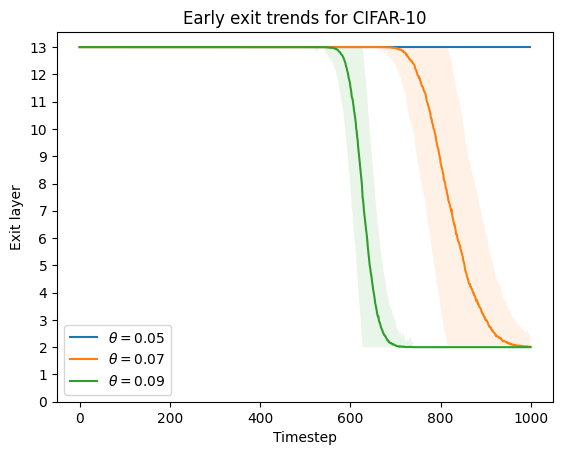

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1000)

plt.ylabel("Exit layer")
plt.xlabel("Timestep")

for threshold, figures in figures_by_threshold.items():
    plt.plot(x, figures["y"], label=rf"$\theta = {threshold}$")
    plt.fill_between(x, figures["y_lower"], figures["y_upper"], alpha=0.1)

plt.yticks(np.arange(14), np.arange(14))
plt.title("Early exit trends for CIFAR-10")
plt.legend()
plt.savefig("outputs/cifar10.pdf")